In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
sns.set(rc={"figure.figsize": (13, 10)})


In [2]:
titanic_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\titanic\train.csv")


In [3]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(
    ["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived


In [6]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
X = pd.get_dummies(X)


In [9]:
X.fillna({"Age": X.Age.median()}, inplace=True)


In [10]:
X.isnull().sum()


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [13]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

[Text(0.43530727230483274, 0.975, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.16101301115241637, 0.925, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.06319702602230483, 0.875, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.048327137546468404, 0.825, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(0.040892193308550186, 0.775, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(0.03345724907063197, 0.725, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.048327137546468404, 0.725, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(0.02973977695167286, 0.675, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.01486988847583643, 0.625, 'Fare <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.007434944237918215, 0.575, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.022304832713754646, 

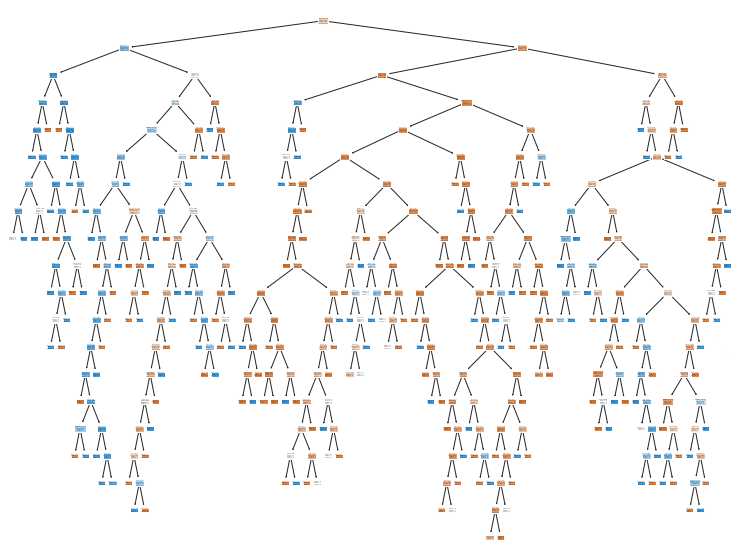

In [14]:
plot_tree(clf,
          filled=True,
          #   class_names=["Negative", "Positive"],
          feature_names=list(X)
          )


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [16]:
X_train.shape


(596, 10)

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [18]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


0.9798657718120806

In [19]:
clf.score(X_test, y_test)


0.7627118644067796

In [20]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8203389830508474

In [21]:

max_deep_values = range(1, 51)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score]})
    scores_data = pd.concat([scores_data, tmp_score_data])


In [22]:
scores_data.head()


,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [23]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score")


In [24]:
scores_data_long


,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
95,46,test_score,0.776271
96,47,test_score,0.762712
97,48,test_score,0.772881
98,49,test_score,0.755932


<AxesSubplot:xlabel='max_depth', ylabel='score'>

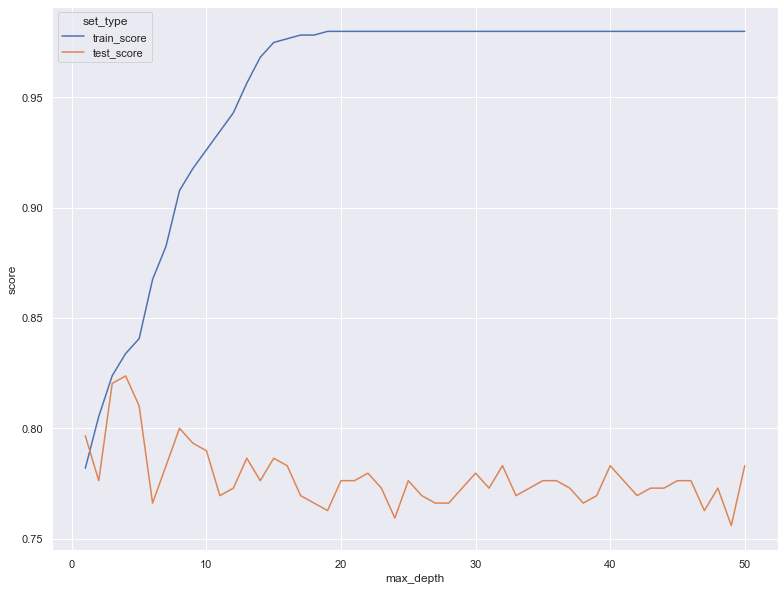

In [25]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


# Cross Validation

In [26]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [27]:
cross_val_score(clf, X_train, y_train, cv=5).mean()


0.7886274509803922

In [28]:

max_deep_values = range(1, 101)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score],
         "cross_val_score": [mean_cross_val]})
    
    scores_data = pd.concat([scores_data, tmp_score_data])
    


In [29]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031
...,...,...,...,...
0,96,0.979866,0.772881,0.773529
0,97,0.979866,0.779661,0.780280
0,98,0.979866,0.769492,0.770182
0,99,0.979866,0.772881,0.768515


In [30]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score",
                                       "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")


In [31]:
scores_data_long.query("set_type == 'cross_val_score'").head()


,max_depth,set_type,score
200,1,cross_val_score,0.781961
201,2,cross_val_score,0.770196
202,3,cross_val_score,0.790322
203,4,cross_val_score,0.788627
204,5,cross_val_score,0.797031


<AxesSubplot:xlabel='max_depth', ylabel='score'>

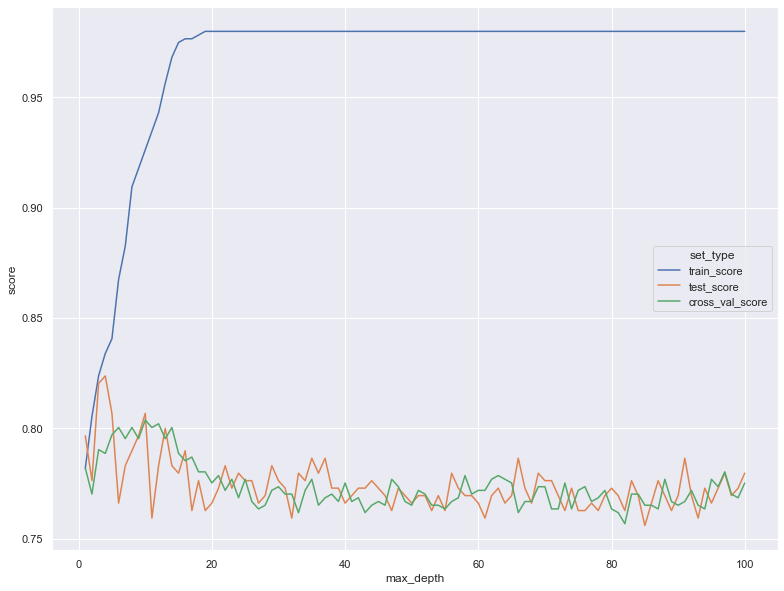

In [32]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


In [33]:
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)


In [34]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()


0.8203389830508474

# Grid Search CV

In [35]:
clf = tree.DecisionTreeClassifier()
parametrs = {"criterion": ["gini", "entropy"],
             "max_depth": range(1, 40)}

In [36]:
grid_search_cv_slf = GridSearchCV(clf, parametrs, cv=10)

In [37]:
# Use cross val score
grid_search_cv_slf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 40)})

In [38]:
grid_search_cv_slf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [39]:
best_clf = grid_search_cv_slf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
best_clf.score(X_test, y_test)

0.8203389830508474

In [41]:
y_pred = best_clf.predict(X_test)

In [42]:
precision_score(y_test, y_pred)

0.8252427184466019

In [43]:
recall_score(y_test, y_pred)

0.7083333333333334

In [44]:
f1_score(y_test, y_pred)

0.7623318385650224

In [45]:
y_predicted_probability = best_clf.predict_proba(X_test)
y_predicted_probability[:5]

array([[0.86144578, 0.13855422],
       [0.86144578, 0.13855422],
       [0.86144578, 0.13855422],
       [0.02857143, 0.97142857],
       [0.44444444, 0.55555556]])

not always corrctly use limit=0.5

<AxesSubplot:>

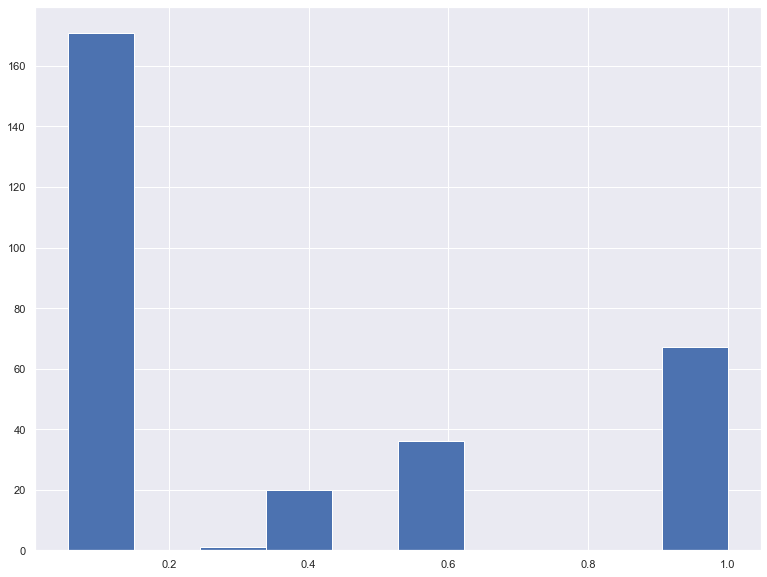

In [46]:
pd.Series(y_predicted_probability[:, 1]).hist()

In [47]:
y_pred = np.where(y_predicted_probability[:, 1] > 0.2, 1, 0)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.75
Recall: 0.775
F1 score: 0.7622950819672132


In [48]:
y_pred = np.where(y_predicted_probability[:, 1] > 0.8, 1, 0)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.9104477611940298
Recall: 0.5083333333333333
F1 score: 0.6524064171122994


# ROC AUC

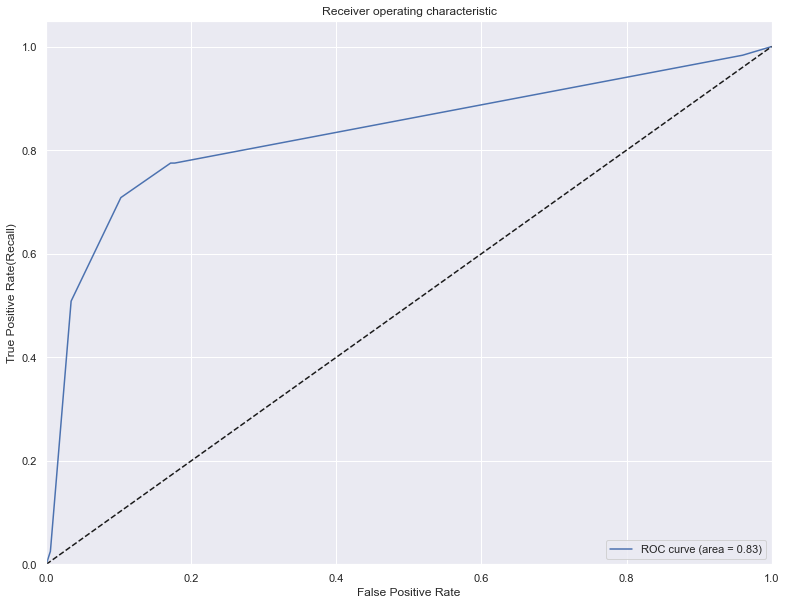

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")